In [91]:
import pandas as pd


from matplotlib import pyplot as plt

from scipy import stats as scs
import numpy as np
from datetime import datetime, timedelta
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'

In [93]:
POP = 39000000

df= pd.read_csv("data/ca_vmt.txt", 
                 sep="\t", 
                 names=["hour","vmt", "truck_vmt", "lane_points","perc_observed"], 
                 skiprows=1, thousands=",",
                 parse_dates=["hour"])
df["car_vmt"] = df["vmt"] - df["truck_vmt"]

df = df[df.hour > "February 20, 2020"].copy()
df = df.set_index('hour')

In [94]:
df.head()

,vmt,truck_vmt,lane_points,perc_observed,car_vmt
hour,,,,,
2020-02-20 01:00:00,3377867.8,244948.4,421152,67.0,3132919.4
2020-02-20 02:00:00,3241369.9,249183.8,421152,66.9,2992186.1
2020-02-20 03:00:00,4425149.8,329552.9,421236,66.6,4095596.9
2020-02-20 04:00:00,8699051.9,517768.1,421152,65.1,8181283.8
2020-02-20 05:00:00,15696181.6,781248.1,421152,65.0,14914933.5


Text(0.5, 1.0, 'Vehicle miles traveled on California highways')

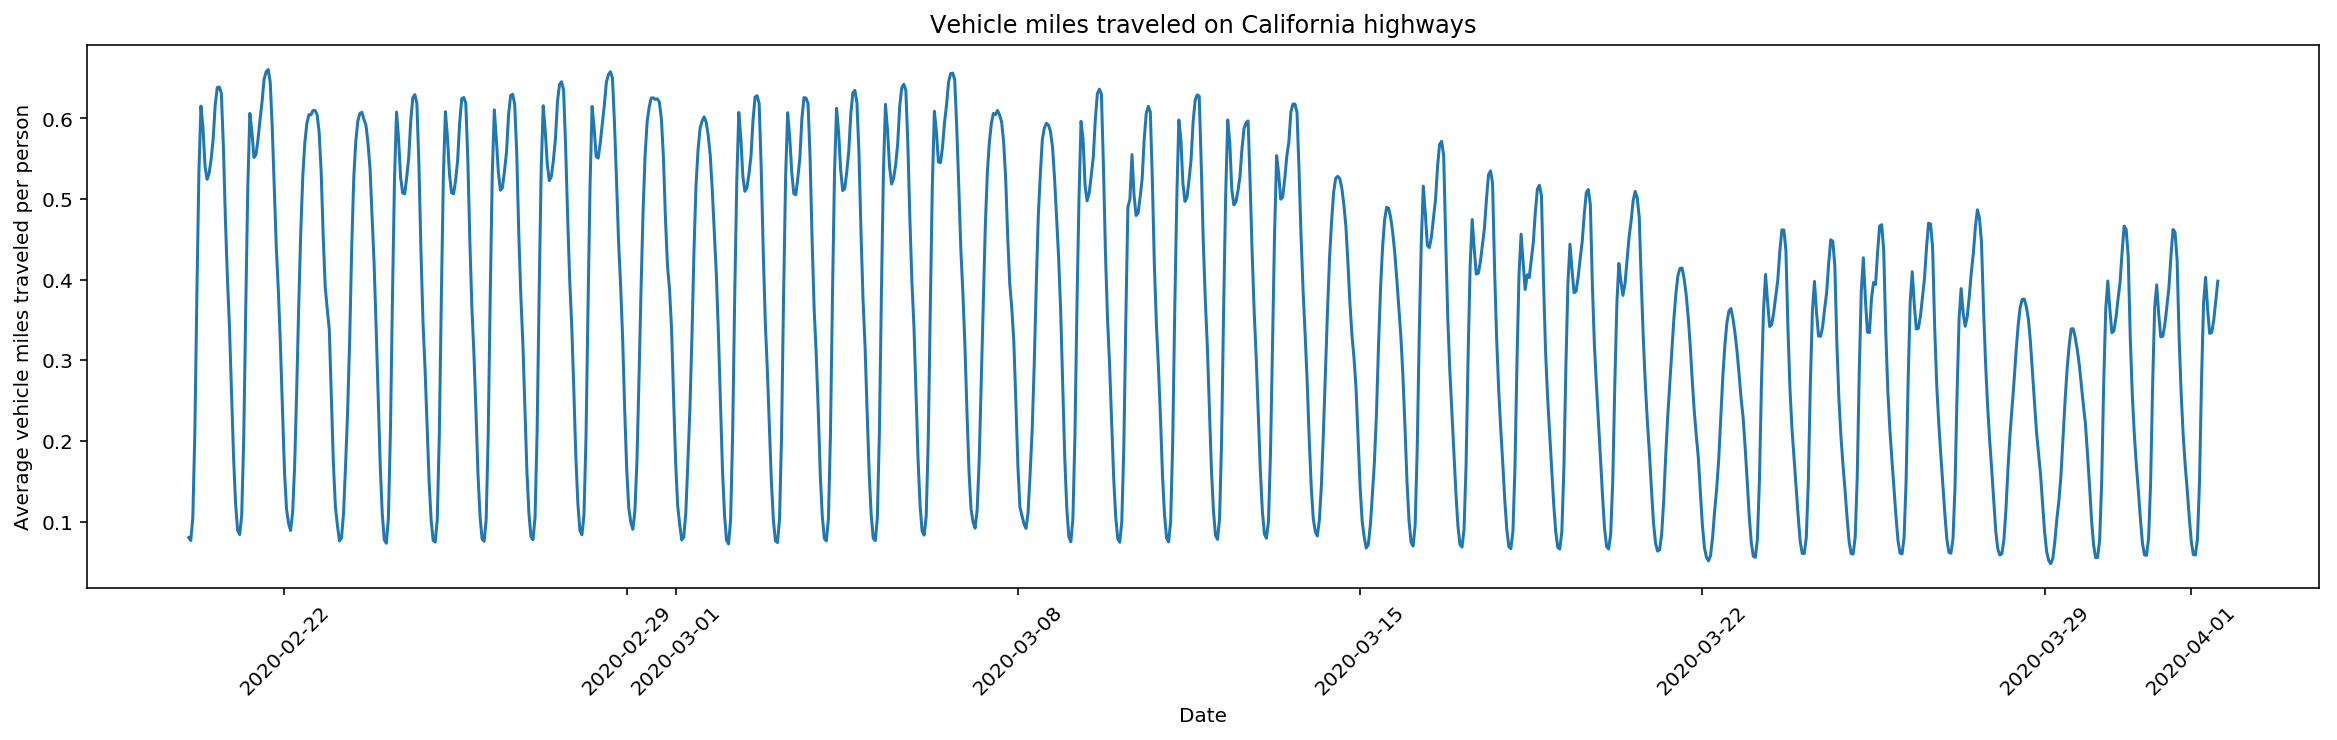

In [96]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df.index, df.car_vmt/POP)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Average vehicle miles traveled per person")
ax.set_xlabel("Date")
ax.set_title("Vehicle miles traveled on California highways")

Text(0.5, 1.0, 'Truck miles traveled on California highways')

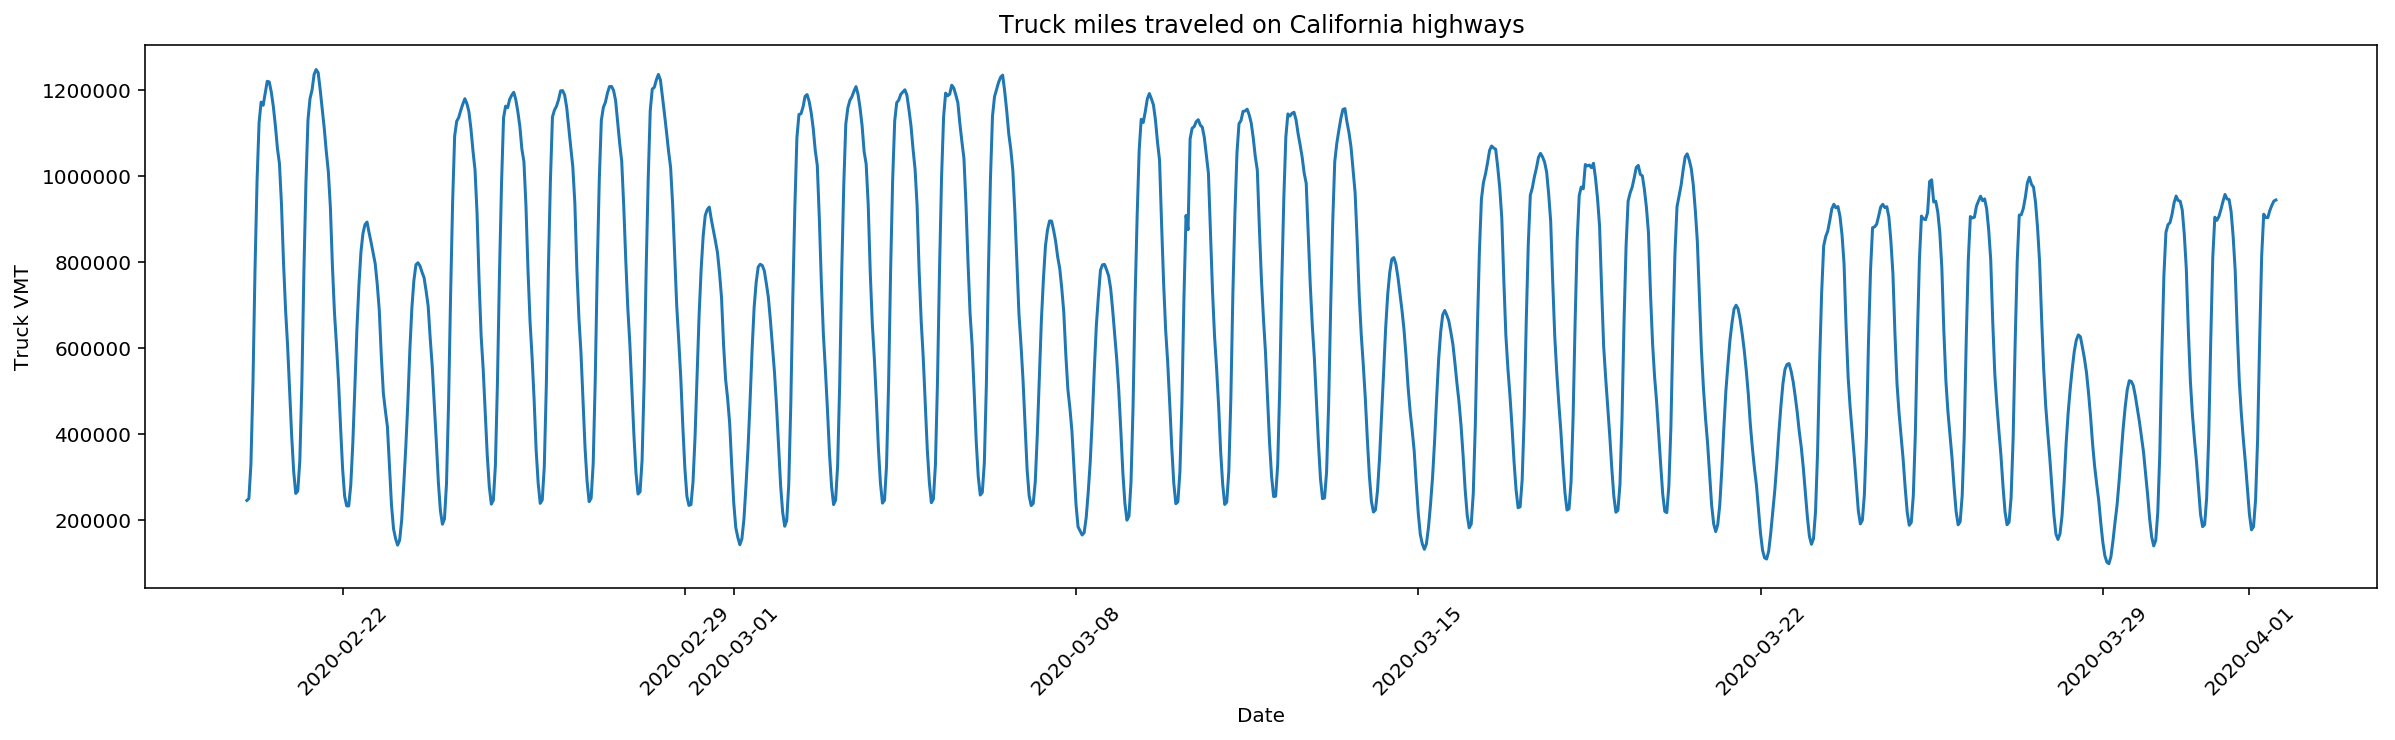

In [142]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df.index, df.truck_vmt)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Truck VMT")
ax.set_xlabel("Date")
ax.set_title("Truck miles traveled on California highways")

In [104]:
time0 = df.index[0]

In [131]:
sampleperiod = 7

normal_times = df[ df.index < time0+timedelta(days=sampleperiod) ]
normal_times_sociality = (normal_times.car_vmt**2).sum()

sip_times = df[ df.index > df.index[-1]-timedelta(days=sampleperiod) ]
sip_sociality = (sip_times.car_vmt**2).sum()


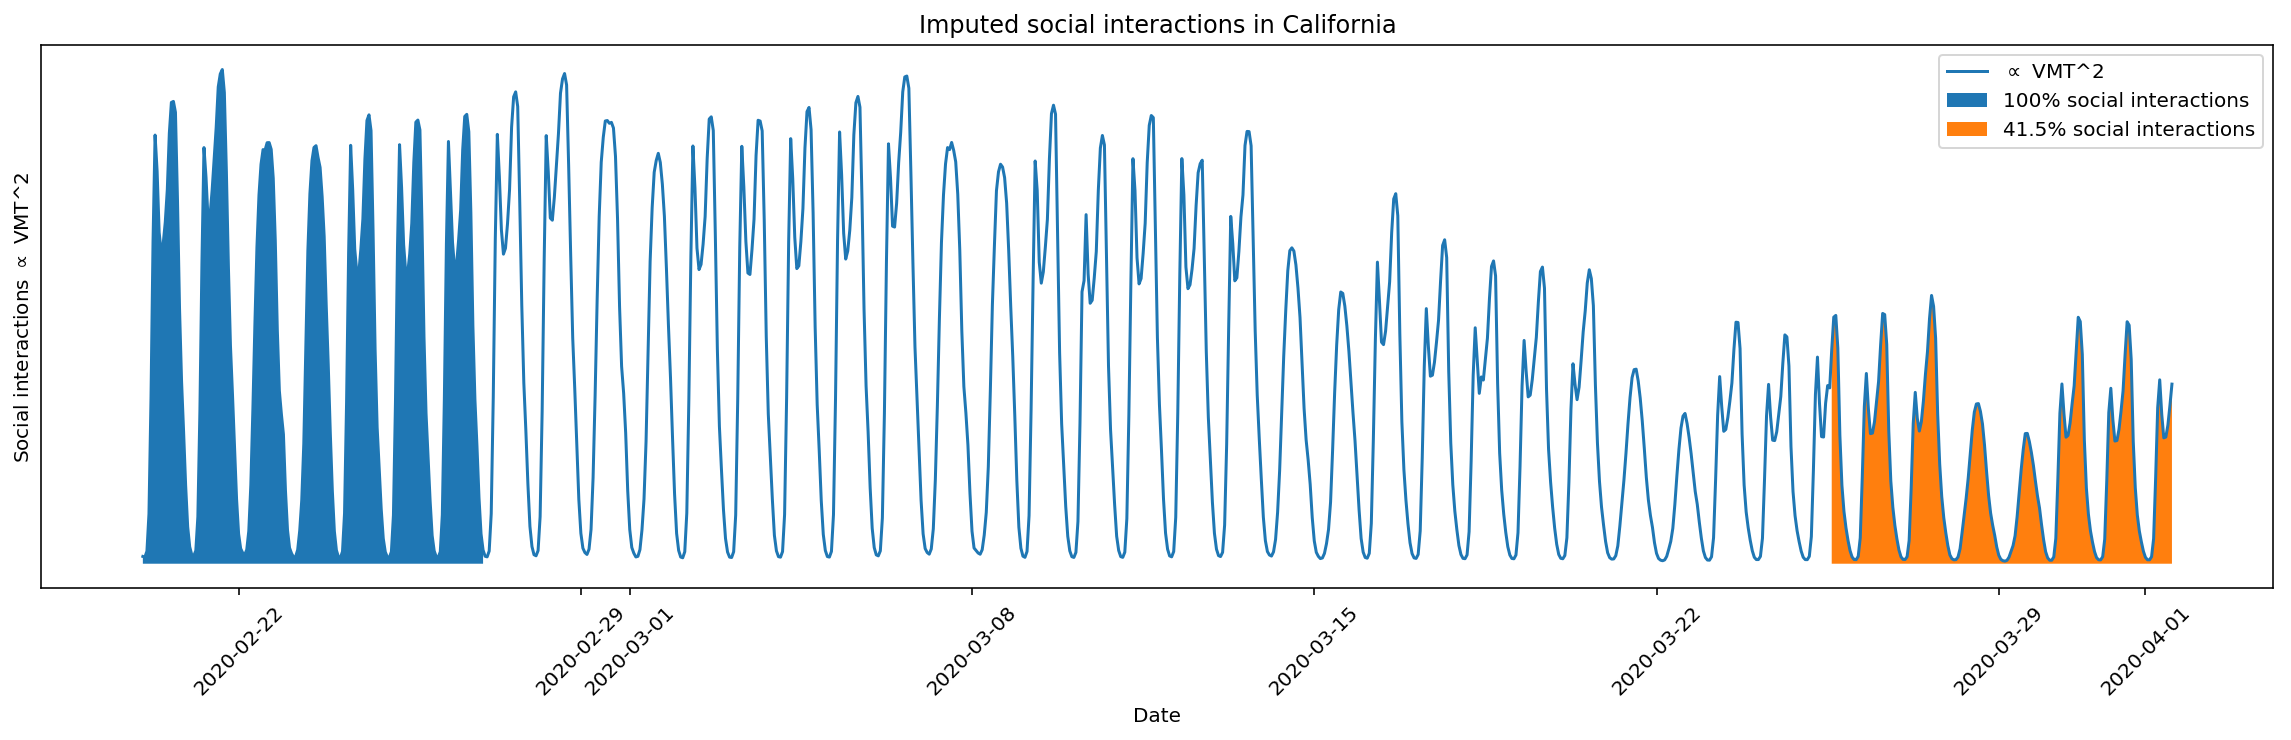

In [143]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df.index, (df.car_vmt**2), label="$\propto$ VMT^2")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Social interactions $\propto$ VMT^2")
ax.set_xlabel("Date")
ax.set_title("Imputed social interactions in California")

ax.set_yticks([])

ax.fill_between(normal_times.index, 0, normal_times.car_vmt**2, label="100% social interactions")
ax.fill_between(sip_times.index, 0, sip_times.car_vmt**2, label="{:0.1f}% social interactions".format(100*sip_sociality/normal_times_sociality))
ax.legend()